In [42]:
import numpy as np

k = 0.835 # Какой то коэффициент
dx = 1 # Шаг по растоянию в см
dt = 0.05 # Шаг по времени в мс

T0 = 660.3 # Температура плавления
T10 = T0/2 
T20 = 0
lam = 0.04175 # Какой то коэффициент

f = lambda x: 33015/(x+100)
f1 = lambda x: sqrt(x*1000)
GN = 11 #длина в см + 0 по кельвину на конце
GNt = int(5/dt) # Количество итераций

T = [[0 for i in range(GNt)] for n in range(GN)]
NP = 0
T[0][0] = T10
for j in range(GNt):
    if j == 0:
        continue
    for i in range(GN-1):
        if i == 0 and (T[i][j-1] > 0):
            if j < 20:
                T[i][j] = T10
            else:
                T[i][j] = f(j-20)
            continue
            
        T[i][j] = T[i][j-1] + lam * (T[i+1][j-1] - 2*T[i][j-1] + T[i-1][j-1])
    #T[GN-1][j] = T[GN-2][j]
#Вывод    
str = ""
for j in range(int(GNt/10)):
    for i in range(GN-1):       
        str += '%.3f' % T[i][j]
        str +="\t"    
    print(str)
    str = ""

330.150	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	
330.150	13.784	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	
330.150	26.417	0.575	0.000	0.000	0.000	0.000	0.000	0.000	0.000	
330.150	38.019	1.630	0.024	0.000	0.000	0.000	0.000	0.000	0.000	
330.150	48.696	3.082	0.090	0.001	0.000	0.000	0.000	0.000	0.000	
330.150	58.542	4.862	0.211	0.005	0.000	0.000	0.000	0.000	0.000	
330.150	67.641	6.909	0.397	0.013	0.000	0.000	0.000	0.000	0.000	
330.150	76.065	9.173	0.653	0.029	0.001	0.000	0.000	0.000	0.000	
330.150	83.880	11.610	0.982	0.053	0.002	0.000	0.000	0.000	0.000	
330.150	91.145	14.183	1.387	0.090	0.004	0.000	0.000	0.000	0.000	


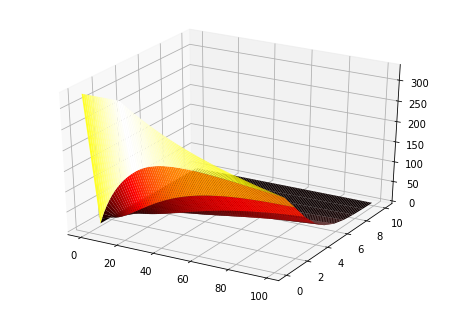

In [43]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D

y = np.arange(0,GN,1)
x = np.arange(0,int(GNt), 1)
#T = [[0 for i in range(10)] for j in range(5)]
#for j in range(GN):
#    for i in range(GNt):
#        T[j][i] = i + j
#print(T)
xs, ys = np.meshgrid(x, y)
# z = calculate_R(xs, ys)
zs = np.array(T)#xs**2 + ys**2
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(xs, ys, zs, rstride=1, cstride=1, cmap='hot')
plt.show()